Coeficiente de correlación:  0.2038 

Coeficiente de determinación:  0.0415 

intervalo de confianza para b1 de  95%
 0.8340 <b1 <  5.7138 



,df,sum_sq,mean_sq,F,PR(>F)
Calories,1.0,1862.009366,1862.009366,7.021112,0.008854
Residual,162.0,42962.643073,265.201500,NaN,NaN


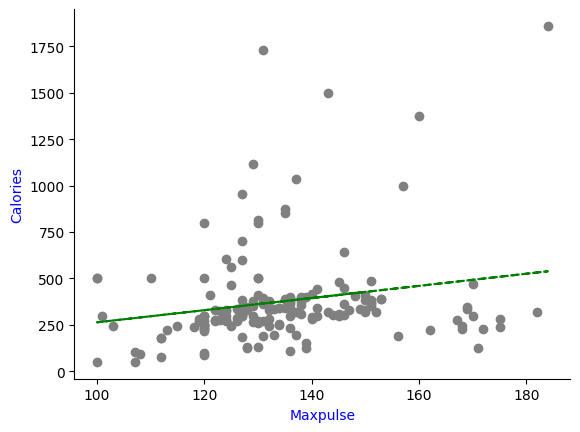

In [16]:
import pandas as pd


#a) Sube la base de datos a tu repositorio e importala a colab mediante pandas.
df = pd.read_csv("https://raw.githubusercontent.com/Taneyquezada/Estadistica/refs/heads/main/data.csv")
df.dropna(inplace = True)

#b) Realiza un gráfico con la dispersión y la recta de regresión ajustada.
#Gráfico de dispersión
X = df["Maxpulse"]
Y = df["Calories"]
import matplotlib.pyplot as plt
plt.scatter(X, Y, color = "gray")
plt.xlabel("Maxpulse", color = "blue")
plt.ylabel("Calories", color ="blue")
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

#Recta de regresión ajustada
import statsmodels.api as sm
x_constante = sm.add_constant(X)
modelo = sm.OLS(Y, x_constante).fit()
b0, b1 = modelo.params
fun = lambda x: b0 + b1*X
Yc = fun(X)
plt.plot(X, Yc, color = "green", linestyle = "--")



#c) Calcula el coeficiente de correlación y el coeficiente de determinación e interpreta los resultados.
#Coeficiente de correlación
from scipy.stats import pearsonr
r,_= pearsonr(X,Y)
print(f"Coeficiente de correlación: {r: 0.4f} \n")
#Interpretación: El coeficiente de correlación es ya que es lejano a 1. No hay una
#buena correspondencia entre la variable independiente y la variable dependiente.

#Coeficiente de determinación
print(f"Coeficiente de determinación: {r**2: 0.4f} \n")
# Interpreatción:Tiene un valor bajo para explicar la variabilidad entre la
#variable independiente y la variable dependiente.
#Al ser de 0.0415, solo el 4.15% explica la variabilidad de una con otra y un 4% es un valor bajo.

#d) Obtén un intervalo de confianza de 98% para la pendiente e interpreta el resultado.
#Respalda tu conclusión usando ANOVA.
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f"intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}")
print(f"{intervalo_de_confianza_b1[0]: 0.4f} <b1 < {intervalo_de_confianza_b1[1]: 0.4f} \n")
#Interpretación; quiere decir que la pendiente está entre los valores 0.8340 <b1 <  5.7138

#ANOVA
from statsmodels.formula.api import ols
modelo_2 = ols("Maxpulse~Calories", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2)
tabla_anova





